In [52]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
path = os.getcwd()

In [53]:
filepath = os.path.join(path, "CreditCardData.csv")
data = pd.read_csv(filepath)
print(data.head(5))
print("\n")
nbins=8

   CustID  CustAge  TmAtAddress   ResStatus EmpStatus  CustIncome  TmWBank  \
0       1       53           62      Tenant   Unknown       50000       55   
1       2       61           22  Home Owner  Employed       52000       25   
2       3       47           30      Tenant  Employed       37000       61   
3       4       50           75  Home Owner  Employed       53000       20   
4       5       68           56  Home Owner  Employed       53000       14   

  OtherCC  AMBalance  UtilRate  status  
0     Yes    1055.93      0.22       0  
1     Yes    1161.58      0.24       0  
2      No     877.23      0.29       0  
3     Yes     157.37      0.08       0  
4     Yes     561.84      0.11       0  




In [54]:
# Common sense checks
r_all = data.shape[0]
r_non_def = data[data.status == 0].shape[0]
r_def = data[data.status == 1].shape[0]

print(f'Is {r_all:} == {r_non_def:} + {r_def:} ?')
print(f'{r_all == r_non_def + r_def}')

Is 1200 == 803 + 397 ?
True


In [55]:
columns = ['CustIncome','status']
df_temp = data[columns]
print(df_temp)

      CustIncome  status
0          50000       0
1          52000       0
2          37000       0
3          53000       0
4          53000       0
...          ...     ...
1195       41000       0
1196       45000       1
1197       27000       1
1198       38000       0
1199       41000       0

[1200 rows x 2 columns]


In [56]:
data.CustAge

data_cuts = pd.qcut(data.CustIncome, nbins)

def get_bins_array(df_predictor):
    bin_array = list()
    for cut in df_predictor.unique():
        bin_array.append(cut.left)
        bin_array.append(cut.right)
        
    bin_array = list( dict.fromkeys( bin_array ) )
    bin_array.append(0)
    bin_array.append(np.inf)
    bin_array.sort()
    return bin_array

bin_array = get_bins_array(data_cuts)
print(bin_array)

[0, 17999.999, 30000.0, 34000.0, 37000.0, 39000.0, 42000.0, 45000.0, 49000.0, 62000.0, inf]


c:\Users\ljohny\miniconda3\envs\model-lineage\lib\site-packages\matplotlib\axes\_axes.py:6895: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


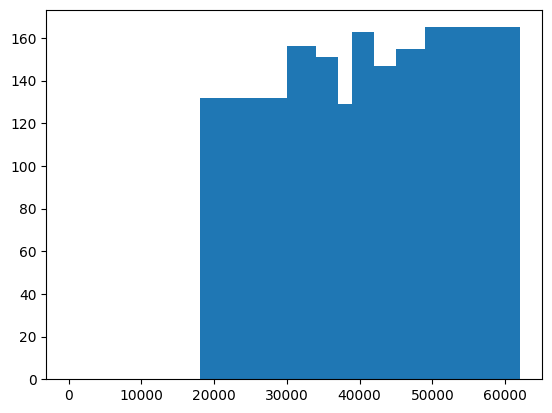

In [57]:
plt.hist(data.CustIncome, bins = bin_array);

In [58]:
df_temp["data_cuts"] = data_cuts
df_temp

C:\Users\ljohny\AppData\Local\Temp\ipykernel_28532\3307541583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["data_cuts"] = data_cuts


,CustIncome,status,data_cuts
0,50000,0,"(49000.0, 62000.0]"
1,52000,0,"(49000.0, 62000.0]"
2,37000,0,"(34000.0, 37000.0]"
3,53000,0,"(49000.0, 62000.0]"
4,53000,0,"(49000.0, 62000.0]"
...,...,...,...
1195,41000,0,"(39000.0, 42000.0]"
1196,45000,1,"(42000.0, 45000.0]"
1197,27000,1,"(17999.999, 30000.0]"
1198,38000,0,"(37000.0, 39000.0]"


In [59]:
df_good_bad_count = df_temp[['status','data_cuts']].groupby(['data_cuts', 'status']).value_counts() ;
df_good_bad_count

def extract_indices_to_list(df_good_bad_count):
    
    # We have two indices in our pandas dataframe
    idx1, idx2 = list(), list()
    for i in df_good_bad_count.index:
        i1 = i[0]
        i2 = i[1]
        idx1.append(i1)
        idx2.append(i2)

    # Unique Elements
    idx1.sort() 
    idx1 = set(idx1)

    idx2.sort()
    idx2 = set(idx2)

    return {"idx1": idx1, "idx2": idx2}

dict_indices = extract_indices_to_list(df_good_bad_count)

C:\Users\ljohny\AppData\Local\Temp\ipykernel_28532\3676131754.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_good_bad_count = df_temp[['status','data_cuts']].groupby(['data_cuts', 'status']).value_counts() ;


In [60]:
# df_good_bad_count = df_good_bad_count.reset_index(level=['status'])
df_good_bad_count

data_cuts             status
(17999.999, 30000.0]  0          82
                      1          84
(30000.0, 34000.0]    0         113
                      1          59
(34000.0, 37000.0]    0         126
                      1          54
(37000.0, 39000.0]    0          67
                      1          44
(39000.0, 42000.0]    0         107
                      1          50
(42000.0, 45000.0]    0         101
                      1          38
(45000.0, 49000.0]    0          96
                      1          35
(49000.0, 62000.0]    0         111
                      1          33
Name: count, dtype: int64

In [61]:
df_unstacked = df_good_bad_count.unstack(level=-1)
df_unstacked

status,0,1
data_cuts,,
"(17999.999, 30000.0]",82,84
"(30000.0, 34000.0]",113,59
"(34000.0, 37000.0]",126,54
"(37000.0, 39000.0]",67,44
"(39000.0, 42000.0]",107,50
"(42000.0, 45000.0]",101,38
"(45000.0, 49000.0]",96,35
"(49000.0, 62000.0]",111,33


In [62]:

# sum_non_defaulters
sum_non_defaulters = 0
for i in dict_indices["idx1"]:
    sum_non_defaulters += df_good_bad_count[i, 0]
print( sum_non_defaulters )

# sum_defaulters
sum_defaulters = 0
for i in dict_indices["idx1"]:
    sum_defaulters += df_good_bad_count[i, 1]
print(sum_defaulters)


803
397


In [63]:
df_unstacked

status,0,1
data_cuts,,
"(17999.999, 30000.0]",82,84
"(30000.0, 34000.0]",113,59
"(34000.0, 37000.0]",126,54
"(37000.0, 39000.0]",67,44
"(39000.0, 42000.0]",107,50
"(42000.0, 45000.0]",101,38
"(45000.0, 49000.0]",96,35
"(49000.0, 62000.0]",111,33


In [64]:
df_percentages = pd.DataFrame()
df_percentages["non_def"] = df_unstacked[0] / sum_non_defaulters
df_percentages["def"] = df_unstacked[1] / sum_defaulters
df_percentages


,non_def,def
data_cuts,,
"(17999.999, 30000.0]",0.102117,0.211587
"(30000.0, 34000.0]",0.140722,0.148615
"(34000.0, 37000.0]",0.156912,0.136020
"(37000.0, 39000.0]",0.083437,0.110831
"(39000.0, 42000.0]",0.133250,0.125945
"(42000.0, 45000.0]",0.125778,0.095718
"(45000.0, 49000.0]",0.119552,0.088161
"(49000.0, 62000.0]",0.138232,0.083123


In [65]:
df1 = pd.merge(df_unstacked, df_percentages, how="left", left_on=df_unstacked.index, right_on=df_percentages.index)
df1

,key_0,0,1,non_def,def
0,"(17999.999, 30000.0]",82,84,0.102117,0.211587
1,"(30000.0, 34000.0]",113,59,0.140722,0.148615
2,"(34000.0, 37000.0]",126,54,0.156912,0.136020
3,"(37000.0, 39000.0]",67,44,0.083437,0.110831
4,"(39000.0, 42000.0]",107,50,0.133250,0.125945
5,"(42000.0, 45000.0]",101,38,0.125778,0.095718
6,"(45000.0, 49000.0]",96,35,0.119552,0.088161
7,"(49000.0, 62000.0]",111,33,0.138232,0.083123


In [66]:
df1["WoE"] = np.log( df1['non_def'] / df1["def"] )
df1

,key_0,0,1,non_def,def,WoE
0,"(17999.999, 30000.0]",82,84,0.102117,0.211587,-0.728516
1,"(30000.0, 34000.0]",113,59,0.140722,0.148615,-0.054568
2,"(34000.0, 37000.0]",126,54,0.156912,0.136020,0.142879
3,"(37000.0, 39000.0]",67,44,0.083437,0.110831,-0.283915
4,"(39000.0, 42000.0]",107,50,0.133250,0.125945,0.056387
5,"(42000.0, 45000.0]",101,38,0.125778,0.095718,0.273116
6,"(45000.0, 49000.0]",96,35,0.119552,0.088161,0.304582
7,"(49000.0, 62000.0]",111,33,0.138232,0.083123,0.508604


In [67]:
df1["IV"] = ( df1["non_def"] - df1["def"] ) * df1["WoE"]
df1

,key_0,0,1,non_def,def,WoE,IV
0,"(17999.999, 30000.0]",82,84,0.102117,0.211587,-0.728516,0.079751
1,"(30000.0, 34000.0]",113,59,0.140722,0.148615,-0.054568,0.000431
2,"(34000.0, 37000.0]",126,54,0.156912,0.136020,0.142879,0.002985
3,"(37000.0, 39000.0]",67,44,0.083437,0.110831,-0.283915,0.007778
4,"(39000.0, 42000.0]",107,50,0.133250,0.125945,0.056387,0.000412
5,"(42000.0, 45000.0]",101,38,0.125778,0.095718,0.273116,0.008210
6,"(45000.0, 49000.0]",96,35,0.119552,0.088161,0.304582,0.009561
7,"(49000.0, 62000.0]",111,33,0.138232,0.083123,0.508604,0.028028


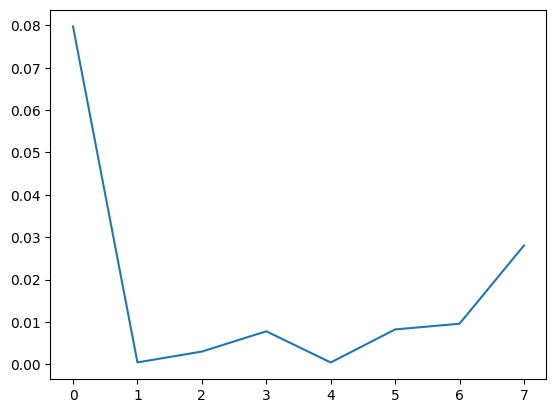

In [68]:
plt.plot(df1["IV"])
